In this notebook we'll look into the vaccination data and try to visualise, interpret and prepare it for use in the Skygrid + covariates and genetic GLM analyses.

In [6]:
vac.data <- read.table("../../DATA/EPI_DATA/vac_FMD.txt", header = TRUE)

In [7]:
head(vac.data)

Year,Argentina,Bolivia,Brazil,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela,Mean,Median
1986,2.50,0.52,2.40,1.62,0.45,1.50,0.20,1.96,0.71,1.32,1.50
1987,3.27,0.32,2.00,1.26,0.32,1.39,0.23,3.04,0.71,1.39,1.26
1988,2.50,0.38,2.55,0.97,0.30,1.74,0.02,3.49,1.04,1.44,1.04
1989,2.48,0.04,1.71,1.00,0.26,1.24,0.10,3.03,0.67,1.17,1.00
1990,3.03,NA,1.67,1.06,0.32,1.55,0.19,3.29,0.91,1.50,1.30
1992,1.49,NA,1.50,0.51,0.23,1.26,0.19,2.28,0.81,1.03,1.04


In [31]:
vac.data.dt <- reshape2::melt(vac.data[, -c(11, 12)], id = c("Year"),
                       variable.name = "country", value.name = "doses_per_head")
head(vac.data.dt)

Year,country,doses_per_head
1986,Argentina,2.50
1987,Argentina,3.27
1988,Argentina,2.50
1989,Argentina,2.48
1990,Argentina,3.03
1992,Argentina,1.49


In [32]:
 library(ggplot2)

Warning message:
“Removed 10 rows containing missing values (geom_path).”Warning message:
“Removed 27 rows containing missing values (geom_point).”

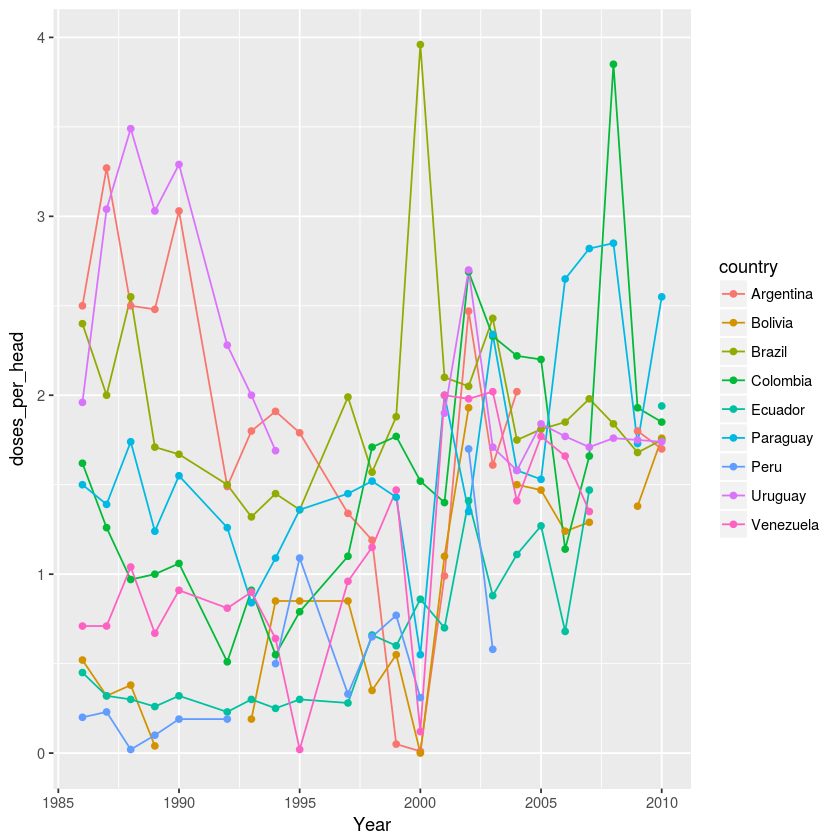

In [52]:
ggplot(vac.data.dt, aes(x = Year, y = doses_per_head, fill = country, colour = country)) +
geom_line() +
geom_point() +
# stat_summary(aes(y = doses_per_head, group = 1), fun.y = mean, colour = "black", geom = "line", group = 1) + 
# geom_smooth()
NULL
 geom_line(aes(y=rollmean(Color, 7, na.pad=TRUE))) +

In [ ]:
Lots of heterogeneity across countries and time

In [ ]:
# see http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)/#Helper%20functions
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [53]:
avg.vac <- summarySE(vac.data.dt, measurevar = "doses_per_head", groupvars = c("Year"), na.rm = TRUE)
head(avg.vac)

Year,N,doses_per_head,sd,se,ci
1986,9,1.317778,0.8742251,0.2914084,0.6719889
1987,9,1.393333,1.1588572,0.3862857,0.8907765
1988,9,1.443333,1.1973199,0.3991066,0.9203416
1989,9,1.170000,1.0607191,0.3535730,0.8153409
1990,8,1.502500,1.1480760,0.4059062,0.9598156
1992,8,1.033750,0.7282256,0.2574666,0.6088118


NULL

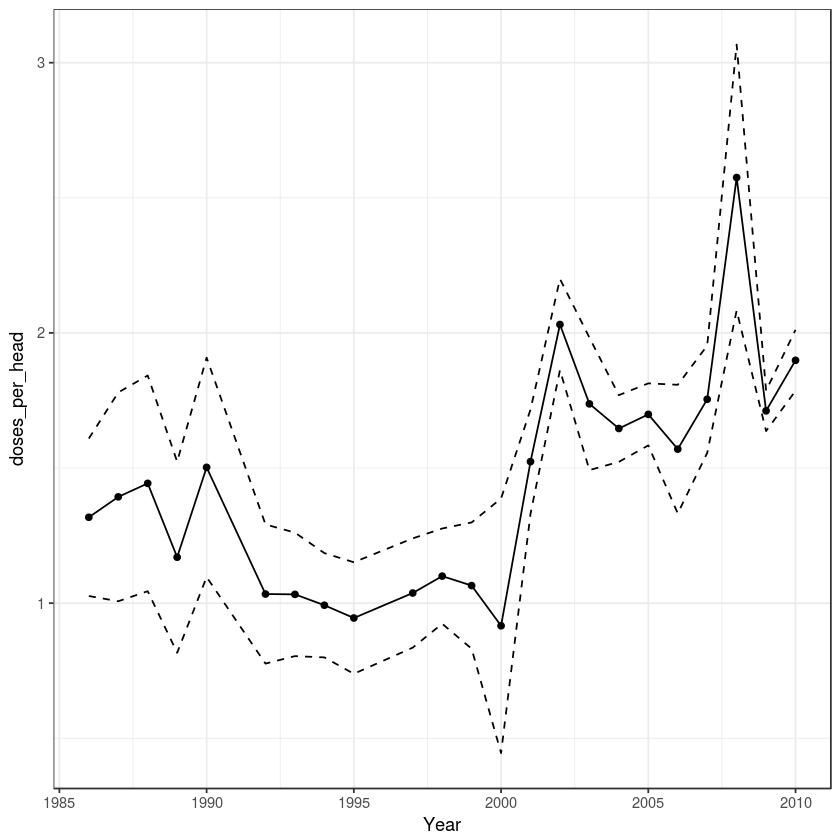

In [71]:
ggplot(avg.vac, aes(x = Year, y = doses_per_head)) +
geom_point() + #size = avg.vac$N
geom_line() +
geom_line(data = avg.vac, aes(x = Year, y = doses_per_head + se), linetype = "dashed")+
geom_line(data = avg.vac, aes(x = Year, y = doses_per_head - se), linetype = "dashed")+
theme_bw()
NULL